<a href="https://colab.research.google.com/github/kayleefoor/Foor_DSPN_S24/blob/main/Exercise_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [14]:
set.seed(123)

X <- rnorm(n=100)
noise <- rnorm(n=100)

beta0 <- 1
beta1 <- 2
beta2 <- -1
beta3 <- 0.5

Y <- beta0 + beta1 * X + beta2 * X^2 + beta3 * X^3 + noise

dat = data.frame(X, noise, Y)

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [8]:
install.packages("leaps")
library(leaps)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [26]:
regfit <- regsubsets(Y~., dat, nvmax=10)
reg.fit.summary <- summary(regfit)
reg.fit.summary

Subset selection object
Call: regsubsets.formula(Y ~ ., dat, nvmax = 10)
2 Variables  (and intercept)
      Forced in Forced out
X         FALSE      FALSE
noise     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: exhaustive
         X   noise
1  ( 1 ) "*" " "  
2  ( 1 ) "*" "*"  

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
Subset selection object
Call: regsubsets.formula(Y ~ ., dat, nvmax = 10)
2 Variables  (and intercept)
      Forced in Forced out
X         FALSE      FALSE
noise     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: exhaustive
         X   noise
1  ( 1 ) "*" " "
2  ( 1 ) "*" "*"

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

In [23]:
library(ggplot2)

In [27]:
numvar = 1:length(reg.fit.summary$rss)
allfalse = rep(FALSE, length(reg.fit.summary$rss))

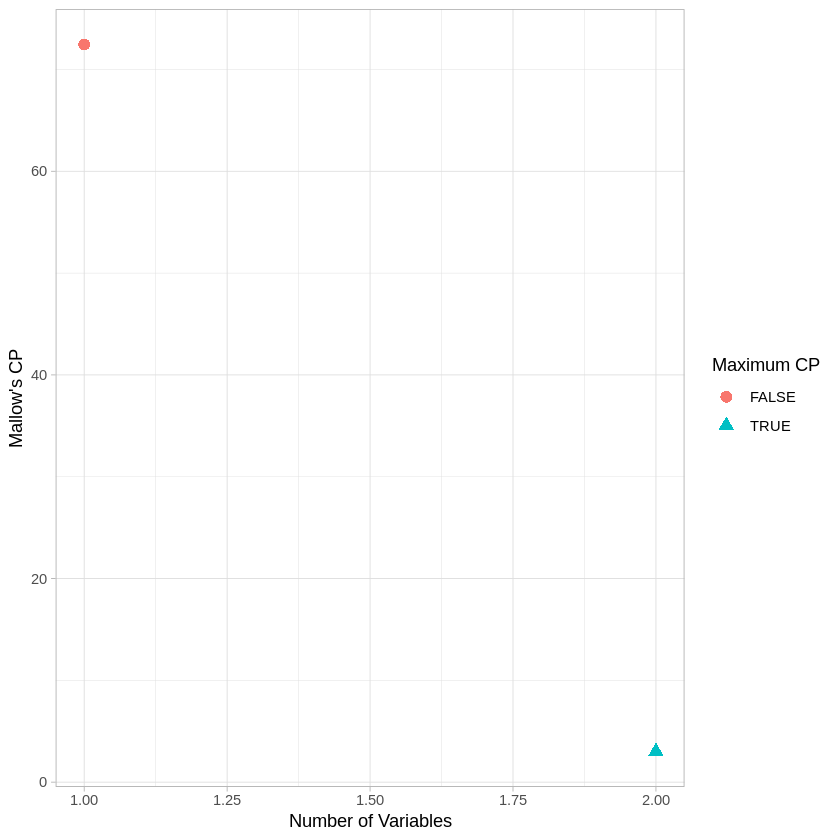

In [30]:
cp.df <- data.frame(numvar = numvar, cp <- reg.fit.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.fit.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

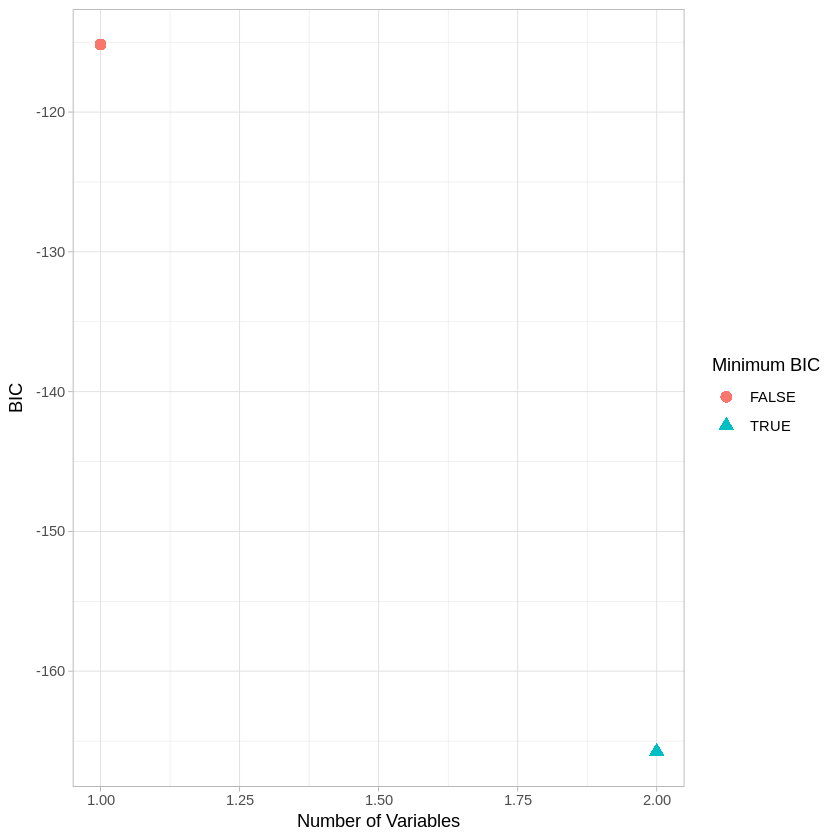

In [31]:
bic.df <- data.frame(numvar = numvar,bic <- reg.fit.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.fit.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

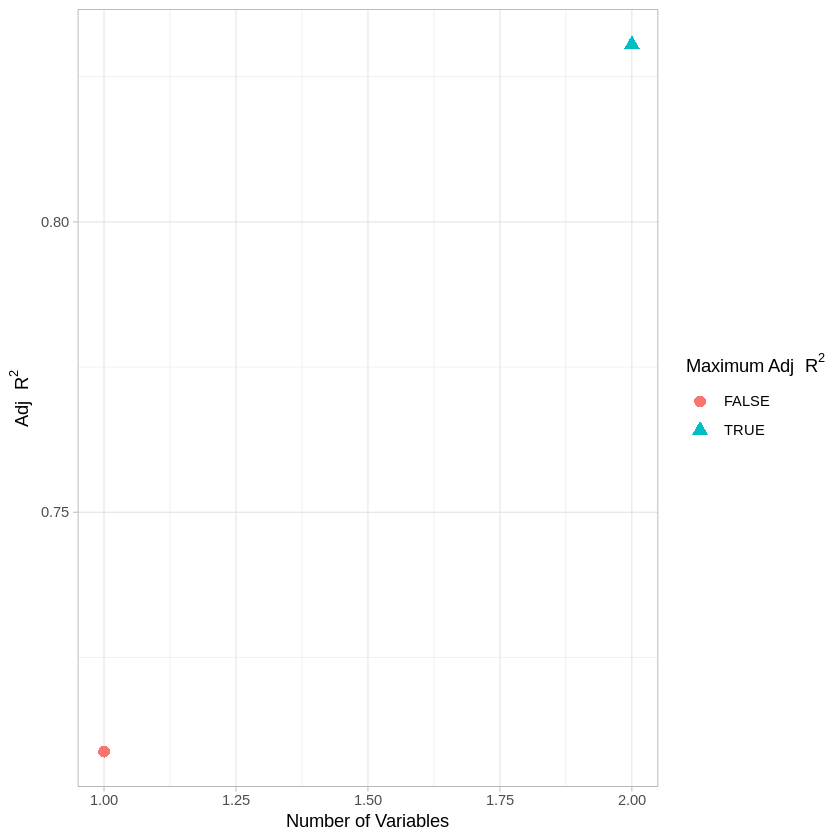

In [32]:
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.fit.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.fit.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)


In [33]:
best_model_index <- which.min(reg.fit.summary$bic)
coef(regfit, best_model_index)

(Intercept)           X       noise 
  0.2295916   2.9620701   1.1371080

> *It appear that the model with 2 variables is the best one for all three tests of reg fit.*
>

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., dat, nvmax = 10, method = "forward")
2 Variables  (and intercept)
      Forced in Forced out
X         FALSE      FALSE
noise     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: forward
         X   noise
1  ( 1 ) "*" " "  
2  ( 1 ) "*" "*"  

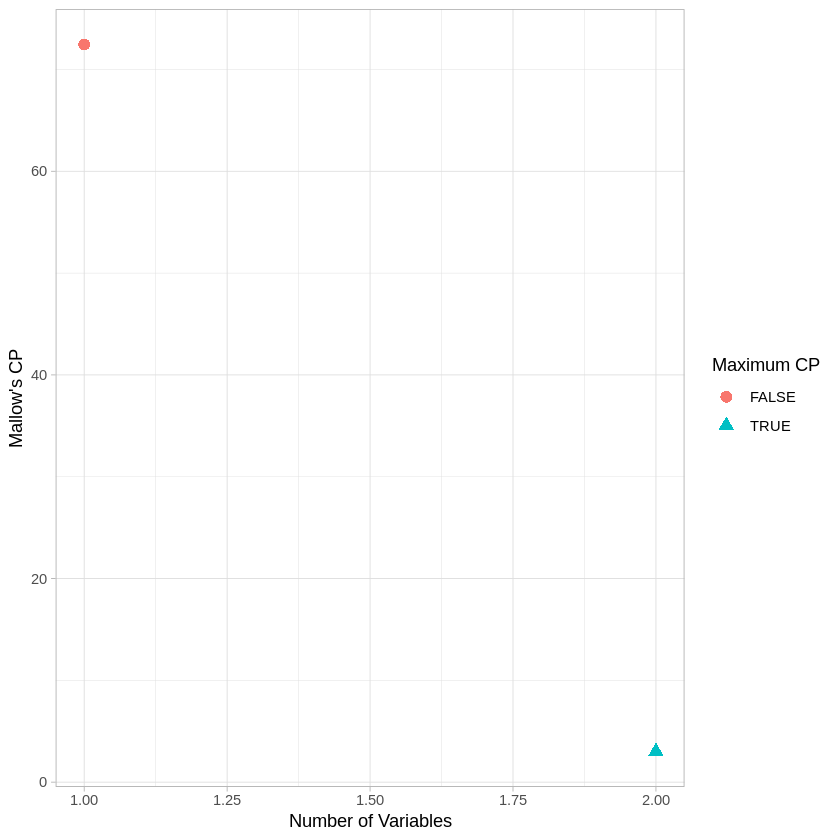

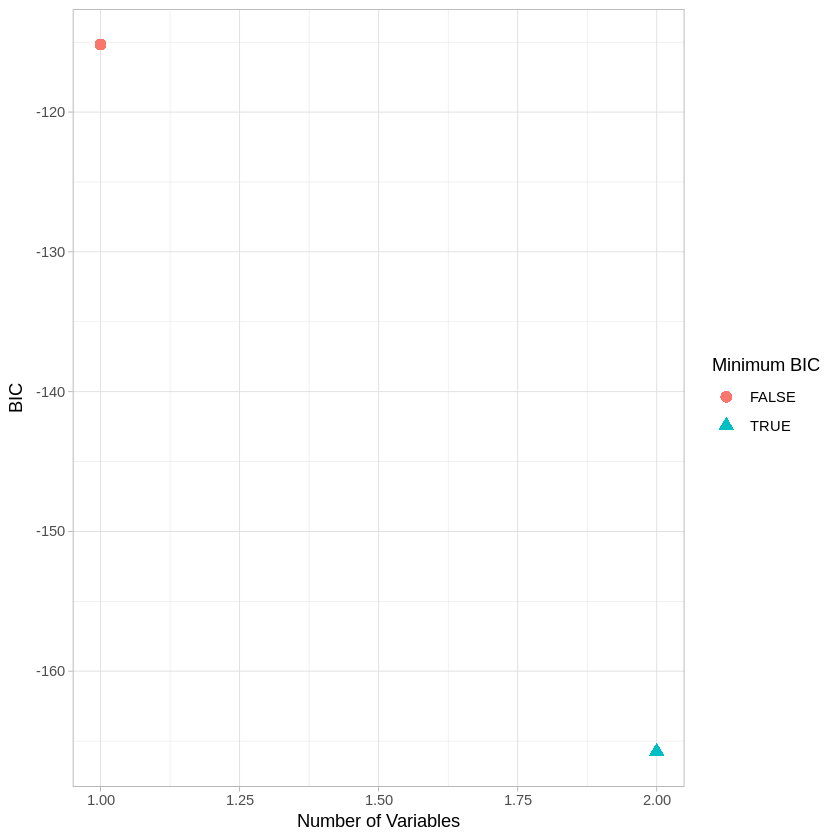

(Intercept)           X       noise 
  0.2295916   2.9620701   1.1371080

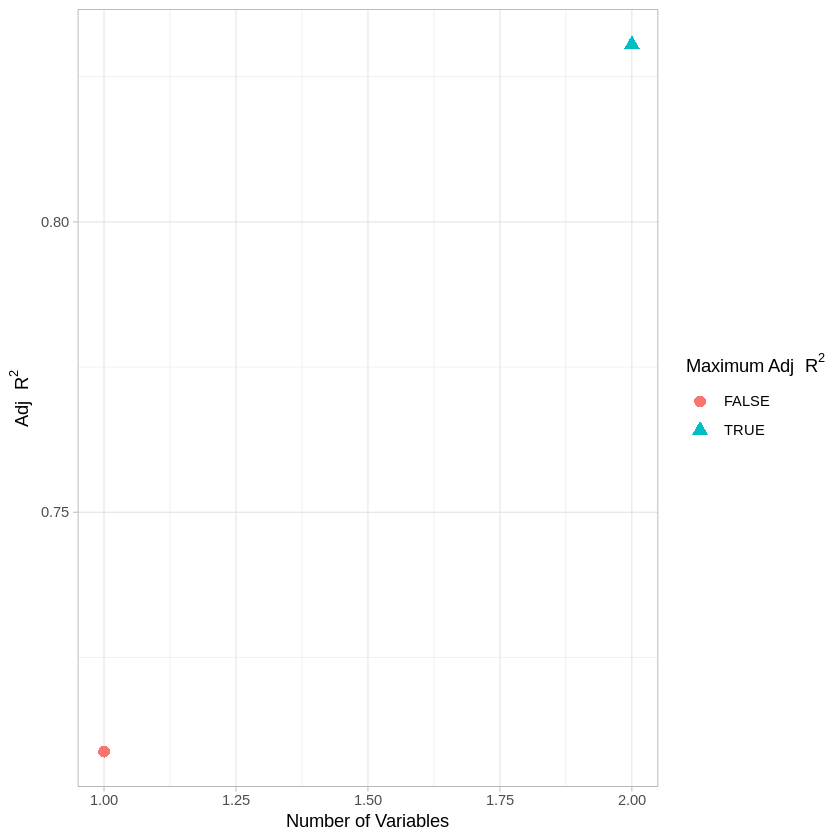

In [40]:
regfit.fwd <- regsubsets(Y~., dat, nvmax=10, method="forward")
reg.fit.fwd.summary <- summary(regfit.fwd)
reg.fit.fwd.summary

numvar = 1:length(reg.fit.fwd.summary$rss)
allfalse = rep(FALSE, length(reg.fit.fwd.summary$rss))

cp.df <- data.frame(numvar = numvar, cp <- reg.fit.fwd.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.fit.fwd.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

bic.df <- data.frame(numvar = numvar,bic <- reg.fit.fwd.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.fit.fwd.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.fit.fwd.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.fit.fwd.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

best_model_index <- which.min(reg.fit.fwd.summary$bic)
coef(regfit.fwd, best_model_index)

In [36]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
Subset selection object
Call: regsubsets.formula(Y ~ ., dat, nvmax = 10, method = "forward")
2 Variables  (and intercept)
      Forced in Forced out
X         FALSE      FALSE
noise     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: forward
         X   noise
1  ( 1 ) "*" " "
2  ( 1 ) "*" "*"
```

ERROR: Error in parse(text = input): attempt to use zero-length variable name


b) Backwards stepwise selection:

In [42]:
regfit.bwd <- regsubsets(Y~., dat, nvmax=10, method="backward")
reg.fit.bwd.summary <- summary(regfit.bwd)
reg.fit.bwd.summary

numvar = 1:length(reg.fit.bwd.summary$rss)
allfalse = rep(FALSE, length(reg.fit.bwd.summary$rss))

cp.df <- data.frame(numvar = numvar, cp <- reg.fit.bwd.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.fit.bwd.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

bic.df <- data.frame(numvar = numvar,bic <- reg.fit.bwd.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.fit.bwd.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.fit.bwd.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.fit.bwd.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

best_model_index <- which.min(reg.fit.bwd.summary$bic)
coef(regfit.bwd, best_model_index)

Subset selection object
Call: regsubsets.formula(Y ~ ., dat, nvmax = 10, method = "backward")
2 Variables  (and intercept)
      Forced in Forced out
X         FALSE      FALSE
noise     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: backward
         X   noise
1  ( 1 ) "*" " "  
2  ( 1 ) "*" "*"  

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
Subset selection object
Call: regsubsets.formula(Y ~ ., dat, nvmax = 10, method = "backward")
2 Variables  (and intercept)
      Forced in Forced out
X         FALSE      FALSE
noise     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: backward
         X   noise
1  ( 1 ) "*" " "
2  ( 1 ) "*" "*"

```

c) Compare your results from parts a and b with those of question 1.

> *ll three methods (best subset, forward stepwise, backward stepwise) selected the same best model with 2 variables (X and noise). The coefficients for the best model are also the same across all three methods.**
>

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [45]:
set.seed(1234)

X <- matrix(rnorm(1000 * 20), 1000, 20)
beta <- rnorm(20)
beta[sample(1:20, 10)] <- 0
noise <- rnorm(1000)
Y <- X %*% beta + noise

train_index <- sample(1:1000, 100)
train_data <- data.frame(X[train_index, ], Y = Y[train_index])
test_data <- data.frame(X[-train_index, ], Y = Y[-train_index])

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

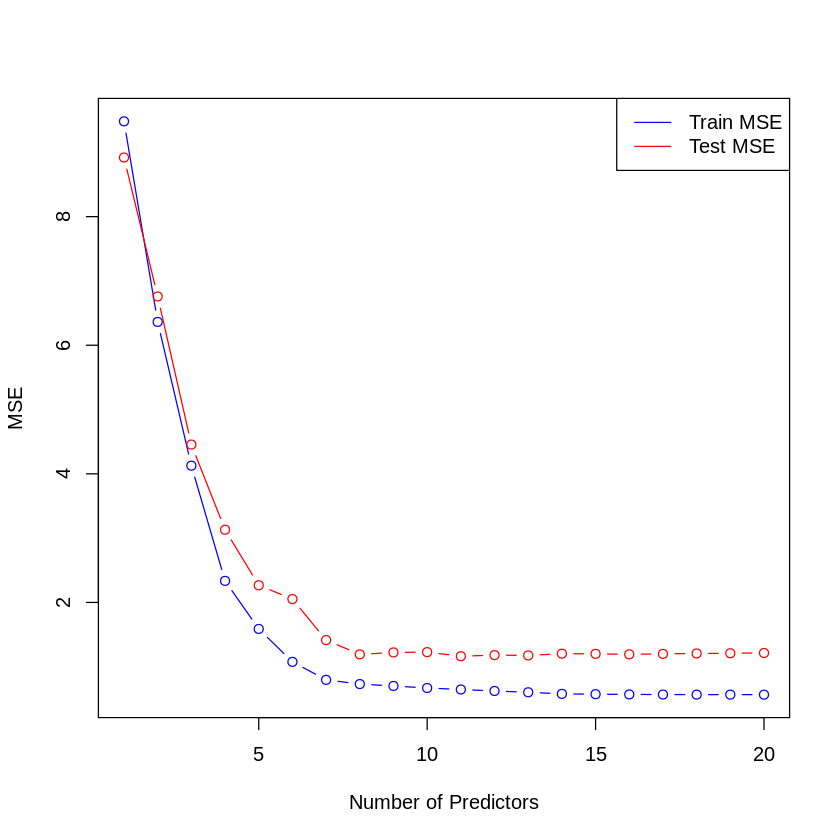

In [47]:
regfit.full <- regsubsets(Y ~ ., data = train_data, nvmax = 20)
train_mse <- rep(NA, 20)
test_mse <- rep(NA, 20)

for (i in 1:20) {
  coefi <- coef(regfit.full, id = i)
  pred_train <- as.matrix(train_data[, names(coefi)[-1]]) %*% coefi[-1] + coefi[1]
  pred_test <- as.matrix(test_data[, names(coefi)[-1]]) %*% coefi[-1] + coefi[1]

  train_mse[i] <- mean((train_data$Y - pred_train)^2)
  test_mse[i] <- mean((test_data$Y - pred_test)^2)
}

plot(1:20, train_mse, type = "b", col = "blue", xlab = "Number of Predictors", ylab = "MSE")
lines(1:20, test_mse, type = "b", col = "red")
legend("topright", legend = c("Train MSE", "Test MSE"), col = c("blue", "red"), lty = 1)


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [49]:
best_model_size <- which.min(test_mse)
best_model_size

[1] 11

> *The best model according to the test MSE has 11 predictors. This model likely includes the predictors with non-zero coefficients in the actual model used to simulate the data, but it may also include some predictors with coefficients that were originally set to zero due to random chance in the training data.*
>

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*